In [186]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [187]:
img1 = cv2.imread('images/landscape1.jpeg')
img2 = cv2.imread('images/landscape2.jpeg')

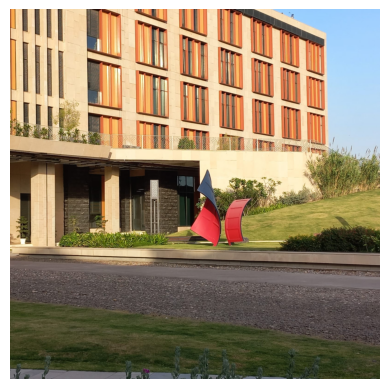

In [188]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

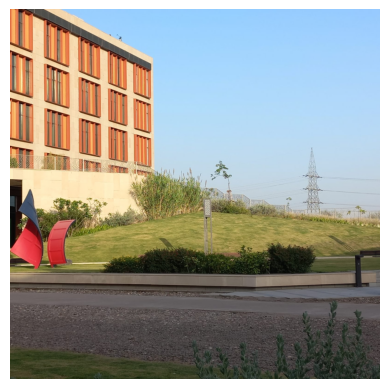

In [189]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [190]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [191]:
sift = cv2.SIFT_create()

In [192]:
kp1, desc1 = sift.detectAndCompute(gray1, None)
kp2, desc2 = sift.detectAndCompute(gray2, None)

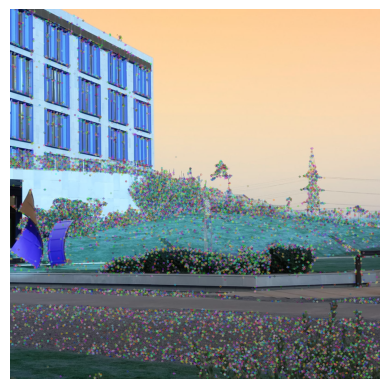

In [193]:
plt.imshow(cv2.drawKeypoints(img2, kp2, None))
plt.axis('off')
plt.show()

In [194]:
flann = cv2.FlannBasedMatcher()
matches = flann.knnMatch(desc1, desc2, k=2)

In [195]:
len(matches)

23117

In [196]:
good = []
for m, n,  in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)

In [197]:
if len(good) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    homo, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
else:
    raise "Not enough good matches"

In [198]:
height, width = img1.shape[:2]
warp_img2 = cv2.warpPerspective(img2, np.linalg.inv(homo), (img1.shape[1]+img2.shape[1], img2.shape[0]))

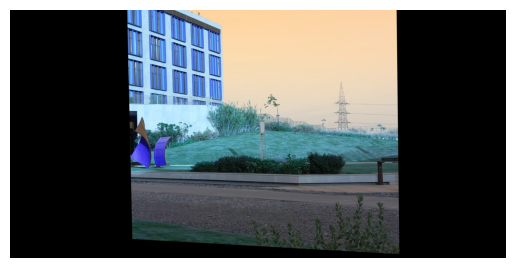

In [199]:
plt.imshow(warp_img2)
plt.axis('off')
plt.show()

In [200]:
res = np.zeros((img2.shape[0], img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
res[:, :width] = img1
res[:, width:] = warp_img2[:, width:]

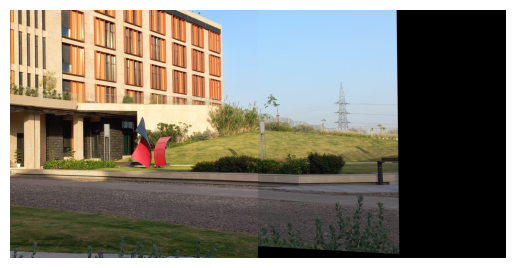

In [201]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()